In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

# 回归

## 多元线性回归

In [2]:
# 使用python自带的波士顿房价数据集
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print("样本的个数 = {},     特征的个数 = {}".format(X.shape[0],X.shape[1]))
print("Boston房价数据集描述:",load_boston().DESCR)
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 506,     特征的个数 = 13
Boston房价数据集描述: .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property

In [3]:
# 导入多元线性回归函数
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()  # 模型实例化
# 模型训练及预测
model_lr=model_lr.fit(X_train,y_train)
y_pred=model_lr.predict(X_test)
# 模型评价：采用MSE和R^2来进行评价
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("多元线性回归模型拟合的均方误差为:{}".format(round(MSE,3)))
print("多元线性回归可以解释原变量%.3f%%的信息"% (r2 *100))

多元线性回归模型拟合的均方误差为:24.769
多元线性回归可以解释原变量60.536%的信息


## 多项式回归

In [4]:
# 使用python自带的波士顿房价数据集
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print("样本的个数 = {},    特征的个数 = {}".format(X.shape[0],X.shape[1]))

# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 506,    特征的个数 = 13


In [5]:
# 导入线性回归函数和将特征生成多项式的函数，并将其结合为pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly=PolynomialFeatures(degree=3)  # 将degree设为3,3次多项式
model_poly=make_pipeline(PolynomialFeatures(degree=2),LinearRegression())
# 模型训练及预测
model_poly=model_poly.fit(X_train,y_train)
y_pred=model_poly.predict(X_test)
# 模型评价：采用MSE和R^2来进行评价
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("多项式回归模型拟合的均方误差为:{}".format(round(MSE,3)))
print("多项式回归可以解释原变量%.3f%%的信息"% (r2 *100))

多项式回归模型拟合的均方误差为:13.787
多项式回归可以解释原变量81.615%的信息


# 判别分析

## logistic回归

In [ ]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
# 导入逻辑回归函数
from sklearn.linear_model import LogisticRegression
model_logistic=LogisticRegression()
# 模型训练及预测
model_logistic=model_logistic.fit(X_train,y_train)
y_pred=model_logistic.predict(X_test)
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("逻辑回归模型拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

逻辑回归模型拟合的准确率为:99.301%


## probit回归

In [8]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留一法划分数据集
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
Accuracy=[]
# loo.split():这里拆分的是index
for train_index,test_index in loo.split(X):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    # 将数据进行标准化
    from sklearn.preprocessing import StandardScaler
    scaler=StandardScaler().fit(X_train)
    X_train=scaler.transform(X_train)
    X_test=scaler.transform(X_test)
    # 导入Probit回归函数
    from statsmodels.discrete.discrete_model import Probit
    import statsmodels.api as sm
    model = Probit(y_train, X_train)
    probit_model = model.fit()
    y_pred=probit_model.predict(X_test)
    y_pred=(y_pred>=0.5)*1
    # 模型评价
    from sklearn.metrics import accuracy_score
    Acc=accuracy_score(y_pred,y_test)
    Accuracy.append(Acc)
print("Accuracy的个数为：{}".format(np.array(Accuracy).shape))
print("使用留一法划分数据集的Probit模型拟合的平均准确率为:%.3f%%"% (np.mean(Accuracy) *100))

样本的个数 = 569, 特征的个数 = 30
Optimization terminated successfully.
         Current function value: 0.025016
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025131
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025012
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025116
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025107
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025164
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025122
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025196
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025152
         Iterations 18
Optimization terminated successfully.
         Cu

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal


Optimization terminated successfully.
         Current function value: nan
         Iterations 20
Optimization terminated successfully.
         Current function value: 0.025227
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025084
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025115
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025114
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.024992
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025273
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025327
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025335
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.02516

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal


Optimization terminated successfully.
         Current function value: nan
         Iterations 21
Optimization terminated successfully.
         Current function value: 0.025192
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025032
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025173
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025163
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025054
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025382
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025132
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025289
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.02520

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025386
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025084
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025053
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025322
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025297
         Iterations 17
Optimization terminated successfully.
         Current function value: nan
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.024943
         Iterations 18
Optimization terminated successfully.

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025198
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025290
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025070
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025232
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025047
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025283
         Iterations 17


D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal


Optimization terminated successfully.
         Current function value: nan
         Iterations 33
Optimization terminated successfully.
         Current function value: 0.025290
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025222
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025254
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025293
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025155
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025090
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025323
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025368
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.02531

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025338
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025296
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025365
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025424
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025202
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025378
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025113
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025317
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025291
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025399
         Iterations 17
Optimiz

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025347
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025479
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025172
         Iterations 18
Optimization terminated successfully.
         Current function value: nan
         Iterations 28
Optimization terminated successfully.
         Current function value: 0.025320
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025122
         Iterations 18


D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: divide by zero encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal


Optimization terminated successfully.
         Current function value: 0.025201
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025152
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025126
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025274
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025170
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.024923
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025090
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025255
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025219
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal


Optimization terminated successfully.
         Current function value: nan
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.025192
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.024970
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025313
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025356
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025029
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025046
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025316
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025313
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.02535

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



         Current function value: 0.025194
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025148
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025333
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025304
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025063
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025356
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025303
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.024937
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025107
         Iterations 18
Optimization terminated successfully.
         Current function value: nan
         Iterations 19
Optimization

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025329
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025296
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025283
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025324
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.024972
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025299
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025008
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025160
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025068
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025225
         Iterations 18
Optimiz

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: divide by zero encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025361
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025349
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025422
         Iterations 18
Optimization terminated successfully.
         Current function value: nan
         Iterations 25
Optimization terminated successfully.
         Current function value: 0.025302
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025344
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.024949
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025355
         Iterations 17
Optimization terminated successfully.

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.024999
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025361
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025347
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025332
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025356
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025387
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025367
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025339
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025318
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025299
         Iterations 17
Optimiz

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025409
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025329
         Iterations 17
Optimization terminated successfully.
         Current function value: nan
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.025335
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025378
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025342
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025182
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.024885
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025108
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025382
         Iterations 17
Optimization

Optimization terminated successfully.
         Current function value: 0.025098
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025051
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025298
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025151
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025299
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025301
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025305
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025334
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025267
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal



         Current function value: 0.025310
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025311
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025305
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.022812
         Iterations 22
Optimization terminated successfully.
         Current function value: 0.025254
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025364
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025083
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025290
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025319
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025296
         Iterations 17
Optimiz

D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: divide by zero encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater_equal


Optimization terminated successfully.
         Current function value: nan
         Iterations 19
Optimization terminated successfully.
         Current function value: 0.025288
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025300
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025071
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025332
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025060
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.024626
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.025303
         Iterations 17
Optimization terminated successfully.
         Current function value: 0.025426
         Iterations 18
Optimization terminated successfully.
         Current function value: 0.02539

In [21]:
z=np.array([1,2,3])
z=z.reshape(3,1)
f(z)

array([[0.24197072],
       [0.05399097],
       [0.00443185]])

In [2]:
# 定义probit回归的激活函数(标准正态分布的分布函数)
from scipy import integrate
import math
import numpy as np
# 定义标准正态分布的概率密度函数
def f(x):
    p=(np.exp(-x**2/2))/(math.sqrt(2*math.pi))
    return p
# 定义标准正态分布的分布函数（即Probit回归的激活函数）
def F(x):
    return integrate.quad(f,-np.inf,x)[0]

In [3]:
def networks(X):
    nums=X.shape[0]
    dims=X.shape[1]
    return nums,dims

def initialize_params(dims):
    W=np.random.randint(0,5,(dims,1))*0.001
    W=np.squeeze(W)
    b=1
    return W,b

def probit(X,y,W,b,nums):
    z=np.dot(X,W)+b
    z=np.squeeze(z)
    p=f(z)
    y_pred=[]
    for i in list(z):
        y_p=F(i)
        y_pred.append(y_p)
    y_pred=np.array(y_pred)
    #print(y_pred)
    cost=-1/nums*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
    dW=-1/nums*(np.dot(X.T,p*(y-z)/(z*(1-z))))
    db=-np.sum(p*(y-z)/(z*(1-z)))/nums
    cost=np.squeeze(cost)
    dW=np.squeeze(dW)
    return y_pred,cost,dW,db

In [4]:
nums,dims=networks(X_train)
W,b=initialize_params(dims)
W=np.squeeze(W)
y_pred,cost,dW,db=probit(X,y,W,b,nums)
y_pred

D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


array([1.        , 1.        , 1.        , 0.99982207, 1.        ,
       0.99997975, 1.        , 0.99999882, 0.99998341, 0.9999761 ,
       0.99999999, 1.        , 1.        , 0.99999843, 0.99997396,
       0.99999957, 0.99999998, 1.        , 1.        , 0.99996559,
       0.99989028, 0.99423877, 0.99999973, 1.        , 1.        ,
       1.        , 0.99999881, 1.        , 1.        , 1.        ,
       1.        , 0.99999843, 1.        , 1.        , 1.        ,
       1.        , 0.99999434, 0.99965809, 0.99998922, 0.99998109,
       0.99998969, 0.99958492, 1.        , 0.99999862, 0.99998002,
       1.        , 0.98791556, 0.99998518, 0.99978418, 0.99996643,
       0.99957682, 0.99992455, 0.99954721, 1.        , 0.99999984,
       0.99945386, 1.        , 0.99999971, 0.99989666, 0.99036975,
       0.99736421, 0.99261705, 0.99999972, 0.99465931, 0.99999838,
       0.99999927, 0.99596382, 0.99908335, 0.99533112, 0.99968926,
       1.        , 0.99295618, 1.        , 0.99999297, 0.99985

In [5]:
def Probit_train(X,y,lr,epochs):
    nums,dims=networks(X)
    W,b=initialize_params(dims)
    for i in range(epochs):
        y_pred,cost,dW,db=probit(X,y,W,b,nums)
        W=W-lr*dW
        b=b-lr*db
        for j in range(len(y_pred)):
            if y_pred[j]>0.5:
                y_pred[j]=1
            else:
                y_pred[j]=0
        acc=(y_pred==y).sum()/nums
        if (i + 1) % 20 == 0:
            print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(i+1, cost, acc))
    return y_pred

In [6]:
lr=1
epochs=1000
Probit_train(X_train,y_train,lr,epochs)

D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in log


epoch: 20, Loss: nan, Acc: 0.21596
epoch: 40, Loss: nan, Acc: 0.21596
epoch: 60, Loss: nan, Acc: 0.21596
epoch: 80, Loss: nan, Acc: 0.22066
epoch: 100, Loss: nan, Acc: 0.22300
epoch: 120, Loss: nan, Acc: 0.22300
epoch: 140, Loss: nan, Acc: 0.22300
epoch: 160, Loss: nan, Acc: 0.22300
epoch: 180, Loss: nan, Acc: 0.22300
epoch: 200, Loss: nan, Acc: 0.22300
epoch: 220, Loss: nan, Acc: 0.22300
epoch: 240, Loss: nan, Acc: 0.22535
epoch: 260, Loss: nan, Acc: 0.22535
epoch: 280, Loss: nan, Acc: 0.22535
epoch: 300, Loss: nan, Acc: 0.22535
epoch: 320, Loss: nan, Acc: 0.22770
epoch: 340, Loss: nan, Acc: 0.22770
epoch: 360, Loss: nan, Acc: 0.22770
epoch: 380, Loss: nan, Acc: 0.22770
epoch: 400, Loss: nan, Acc: 0.22770
epoch: 420, Loss: nan, Acc: 0.22770
epoch: 440, Loss: nan, Acc: 0.23005
epoch: 460, Loss: nan, Acc: 0.22770
epoch: 480, Loss: nan, Acc: 0.22770
epoch: 500, Loss: nan, Acc: 0.22770
epoch: 520, Loss: nan, Acc: 0.22770
epoch: 540, Loss: nan, Acc: 0.22770
epoch: 560, Loss: nan, Acc: 0.22

array([0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 0.

In [31]:
nums,dims=networks(X)
W,b=initialize_params(dims)
print(W.shape)
y_pred,cost,dW,db=probit(X,y,W,b,nums)

(30, 1)


In [35]:
for i in range(epochs):
    y_pred,cost,dW,db=probit(X,y,W,b,nums)
    print(dW)
    W=W-lr*dW
    b=b-lr*db
    for i in range(len(y_pred)):
        if y_pred[i]>0.5:
            y_pred[i]=1
        else:
            y_pred[i]=0
    acc=(y_pred==y).sum()/nums

[[-6.48392498e+01 -6.48392498e+01 -6.48392498e+01 ... -6.48392498e+01
  -6.48392498e+01 -3.01837620e+00]
 [-9.50367977e+01 -9.50367977e+01 -9.50367977e+01 ... -9.50367977e+01
  -9.50367977e+01 -4.15925648e+00]
 [-4.19497507e+02 -4.19497507e+02 -4.19497507e+02 ... -4.19497507e+02
  -4.19497507e+02 -1.96331750e+01]
 ...
 [-4.74102429e-01 -4.74102429e-01 -4.74102429e-01 ... -4.74102429e-01
  -4.74102429e-01 -2.41980599e-02]
 [-1.44767308e+00 -1.44767308e+00 -1.44767308e+00 ... -1.44767308e+00
  -1.44767308e+00 -6.26715984e-02]
 [-4.25771435e-01 -4.25771435e-01 -4.25771435e-01 ... -4.25771435e-01
  -4.25771435e-01 -1.81664104e-02]]


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [76]:
def numpy_to_tensor(X):
    return torch.tensor(X,dtype=torch.float32)

def networks(X):
    nums=X.shape[0]
    dims=X.shape[1]
    return nums,dims

def initialize_params(dims):
    W=torch.rand((dims,1),requires_grad=True)
    b=torch.zeros((1),requires_grad=True)
    return W,b

def forward(X,y,W,b,lr):
    z=torch.mm(X,W)+b
    z=z.data.numpy()
    y_pred=[]
    for k in list(z):
        z_pred=F(k)
        y_pred.append(z_pred)
    y_pred=torch.tensor(np.array(y_pred))
    L=-(y * torch.log(y_pred) + (1 - y) * torch.log(1-y_pred)).mean()
    return y_pred,L

In [86]:
def Probit(X,y):
    nums,dims=networks(X)
    W,b=initialize_params(dims)
    lr=0.01
    for i in range(2):
        z=torch.mm(X,W)+b
        z=z.data.numpy()
        y_pred=[]
        for k in list(z):
            z_pred=F(k)
            y_pred.append(z_pred)
        y_pred=torch.tensor(np.array(y_pred))
        L=-(y * torch.log(y_pred) + (1 - y) * torch.log(1-y_pred)).mean()
        L.backward()
        W.data=W.data-lr*W.grad.data
        b.data=b.data-lr*b.grad.data
        mask = y_pred.ge(0.5).float()
        acc = (mask == y.data).sum().data[0] / y.data.shape[0]
        if (i + 1) % 200 == 0:
            print('epoch: {}, Loss: {:.5f}, Acc: {:.5f}'.format(i+1, L.data[0], acc))

In [65]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [66]:
from statsmodels.discrete.discrete_model import Probit
import statsmodels.api as sm
model = Probit(y_train, X_train)
probit_model = model.fit()

Optimization terminated successfully.
         Current function value: nan
         Iterations 26


D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:2125: RuntimeWarning: invalid value encountered in true_divide
  L = q*self.pdf(q*XB)/self.cdf(q*XB)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\optimizer.py:300: RuntimeWarning: invalid value encountered in greater
  oldparams) > tol)):


In [67]:
print(probit_model.summary())
y_pred=probit_model.predict(X_test)
print(y_pred)

                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  512
Model:                         Probit   Df Residuals:                      482
Method:                           MLE   Df Model:                           29
Date:                Fri, 24 Apr 2020   Pseudo R-squ.:                     nan
Time:                        19:38:17   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -336.61
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        nan         nan         nan
x1                nan        nan        nan        nan         nan         nan
x2                nan        nan        nan        n

D:\Users\kw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\Users\kw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\Users\kw\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:3917: RuntimeWarning: invalid value encountered in less
  predclose_sum = (absprederror < 1e-4).sum()


In [63]:
y_pred=y_pred.astype(int)

In [62]:
y_test

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1])

In [64]:

# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("线性判别模型拟合的准确率为:%.3f%%"% (Acc *100))

线性判别模型拟合的准确率为:98.246%


In [38]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
X=scaler.transform(X)

In [39]:
model = Probit(y, X)
probit_model = model.fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.025199
         Iterations 17
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                  569
Model:                         Probit   Df Residuals:                      539
Method:                           MLE   Df Model:                           29
Date:                Fri, 24 Apr 2020   Pseudo R-squ.:                  0.9618
Time:                        19:28:52   Log-Likelihood:                -14.338
converged:                       True   LL-Null:                       -375.72
Covariance Type:            nonrobust   LLR p-value:                1.736e-133
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           165.0808    109.766      1.504      0.133     -50.057     380.219
x2            -1.0002      1

In [41]:
def initialize_params(dims):
    W=torch.rand((dims,1),requires_grad=True)
    b=torch.zeros((1),requires_grad=True)
    return W,b
W,b=initialize_params(30)

In [89]:
z=torch.mm(X_train,W)+b
z=z.data.numpy()
y_pred=[]
for k in list(z):
    z_pred=F(k)
    y_pred.append(z_pred)
y_pred=torch.tensor(np.array(y_pred))
L=-(y_train * torch.log(y_pred) + (1 - y_train) * torch.log(1-y_pred)).mean()
L.backward()
W.data=W.data-lr*W.grad.data
b.data=b.data-lr*b.grad.data
mask = y_pred.ge(0.5).float()
acc = (mask == y.data).sum().data[0] / y.data.shape[0]

RuntimeError: expected device cpu and dtype Double but got device cpu and dtype Float

In [58]:
X=np.array([1,2,3])
def F(x):
    z,r=integrate.quad(f,-np.inf,x)
    return z

In [79]:
Probit(X_train,y_train)

RuntimeError: expected device cpu and dtype Double but got device cpu and dtype Float

## 线性判别分析（LDA）

In [9]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [10]:
# 导入线性判别函数：LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model_lda=LinearDiscriminantAnalysis()
# 模型训练及预测
model_lda=model_lda.fit(X_train,y_train)
y_pred=model_lda.predict(X_test)
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("线性判别模型拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        51
           1       1.00      0.97      0.98        92

    accuracy                           0.98       143
   macro avg       0.97      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

线性判别模型拟合的准确率为:97.902%


## 二次判别分析（QDA）

In [11]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [12]:
# 导入二次判别函数：QDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model_qda=QuadraticDiscriminantAnalysis()
# 模型训练及预测
model_qda=model_qda.fit(X_train,y_train)
y_pred=model_qda.predict(X_test)
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("二次判别模型拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        53
           1       1.00      0.99      0.99        90

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

二次判别模型拟合的准确率为:99.301%


## K近邻（KNN）

In [13]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [14]:
# 导入K近邻函数：KNN
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier(n_neighbors=5)
# 模型训练及预测
model_knn=model_knn.fit(X_train,y_train)
y_pred=model_knn.predict(X_test)
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("K近邻模型拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        53
           1       0.99      0.98      0.98        90

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

K近邻模型拟合的准确率为:97.902%


## 朴素贝叶斯

In [17]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [16]:
# 导入高斯朴素贝叶斯函数
from sklearn.naive_bayes import GaussianNB
model_bayes=GaussianNB()
# 模型训练及预测
model_bayes=model_bayes.fit(X_train,y_train)
y_pred=model_bayes.predict(X_test)
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred,y_test))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("高斯朴素贝叶斯模型拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        49
           1       1.00      0.95      0.97        94

    accuracy                           0.97       143
   macro avg       0.95      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143

高斯朴素贝叶斯模型拟合的准确率为:96.503%


# 数据集划分及模型评价

## 留一法

In [13]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留一法划分数据集
from sklearn.model_selection import LeaveOneOut
loo=LeaveOneOut()
Accuracy=[]
# loo.split():这里拆分的是index
for train_index,test_index in loo.split(X):
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    model_bayes=model_bayes.fit(X_train,y_train)
    y_pred=model_bayes.predict(X_test)
    # 模型评价
    from sklearn.metrics import accuracy_score
    Acc=accuracy_score(y_pred,y_test)
    Accuracy.append(Acc)
print("Accuracy的个数为：{}".format(np.array(Accuracy).shape))
print("使用留一法划分数据集的高斯朴素贝叶斯模型拟合的平均准确率为:%.3f%%"% (np.mean(Accuracy) *100))

样本的个数 = 569, 特征的个数 = 30
Accuracy的个数为：(569,)
使用留一法划分数据集的高斯朴素贝叶斯模型拟合的平均准确率为:93.849%


## K折交叉验证法

In [14]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用交叉验证法划分数据集
from sklearn.model_selection import cross_val_score
# 进行10折交叉验证训练及评价
scores=cross_val_score(model_bayes,X,y,cv=10)
Acc=np.mean(scores)
print("Accuracy的个数为：{}".format(np.array(scores).shape))
print("使用十折交叉验证法划分数据集的高斯朴素贝叶斯模型拟合的平均准确率为:%.3f%%"% 
      \n(np.mean(Acc) *100))

样本的个数 = 569, 特征的个数 = 30
Accuracy的个数为：(10,)
使用十折交叉验证法划分数据集的高斯朴素贝叶斯模型拟合的平均准确率为:93.678%


## 自助法

In [15]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用自助法划分数据集(可重复抽样)
X_train=pd.DataFrame(X).sample(frac=1.0,replace=True)
X_test=pd.DataFrame(X).loc[pd.DataFrame(X).index.difference(X_train.index)].copy()
y_train=y[X_train.index]
y_test=y[X_test.index]
# 模型训练及预测
model_bayes=model_bayes.fit(np.array(X_train),y_train)
y_pred=model_bayes.predict(np.array(X_test))
# 模型评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("使用自助法划分数据集的高斯朴素贝叶斯模型拟合的平均准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
使用自助法划分数据集的高斯朴素贝叶斯模型拟合的平均准确率为:93.897%


## ROC & AUC

In [22]:
# 产生一个二分类数据集，n_samples=10000
import numpy as np
np.random.seed(123)
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

(10000, 20)


In [23]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# logistic回归
model_logistic=model_logistic.fit(X_train,y_train)
y_pred_logistic=model_logistic.predict_proba(X_test)[:,1]
fpr_logistic, tpr_logistic,_= roc_curve(y_test, y_pred_logistic, pos_label=1)
area_logistic=auc(fpr_logistic, tpr_logistic)
# probit回归
model = Probit(y_train, X_train)
model_probit = model.fit()
y_pred_probit=model_probit.predict(X_test)
fpr_probit, tpr_probit,_= roc_curve(y_test, y_pred_probit, pos_label=1)
area_probit=auc(fpr_probit, tpr_probit)
# LDA
model_lda=model_lda.fit(X_train,y_train)
y_pred_lda=model_lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda,_= roc_curve(y_test, y_pred_lda, pos_label=1)
area_lda=auc(fpr_lda, tpr_lda)
# QDA
model_qda=model_qda.fit(X_train,y_train)
y_pred_qda=model_qda.predict_proba(X_test)[:,1]
fpr_qda, tpr_qda,_= roc_curve(y_test, y_pred_qda, pos_label=1)
area_qda=auc(fpr_qda, tpr_qda)
# KNN
model_knn=model_knn.fit(X_train,y_train)
y_pred_knn=model_knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn,_= roc_curve(y_test, y_pred_knn, pos_label=1)
area_knn=auc(fpr_knn, tpr_knn)
# Gauss Navie Bayes
model_bayes=model_bayes.fit(X_train,y_train)
y_pred_bayes=model_bayes.predict_proba(X_test)[:,1]
fpr_bayes, tpr_bayes,_= roc_curve(y_test, y_pred_bayes, pos_label=1)
area_bayes=auc(fpr_bayes, tpr_bayes)

         Current function value: 0.192256
         Iterations: 35


D:\Users\kw\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
D:\Users\kw\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
# logistic回归
y_pred_logistic=model_logistic.predict_proba(X_test)[:,1]
fpr_logistic, tpr_logistic,_= roc_curve(y_test, y_pred_logistic, pos_label=1)
area_logistic=auc(fpr_logistic, tpr_logistic)
# probit回归
model = Probit(y_train, X_train)
model_probit = model.fit()
y_pred_probit=model_probit.predict(X_test)
fpr_probit, tpr_probit,_= roc_curve(y_test, y_pred_probit, pos_label=1)
area_probit=auc(fpr_probit, tpr_probit)
# LDA
model_lda=model_lda.fit(X_train,y_train)
y_pred_lda=model_lda.predict_proba(X_test)[:,1]
fpr_lda, tpr_lda,_= roc_curve(y_test, y_pred_lda, pos_label=1)
area_lda=auc(fpr_lda, tpr_lda)
# QDA
model_qda=model_qda.fit(X_train,y_train)
y_pred_qda=model_qda.predict_proba(X_test)[:,1]
fpr_qda, tpr_qda,_= roc_curve(y_test, y_pred_qda, pos_label=1)
area_qda=auc(fpr_qda, tpr_qda)
# KNN
model_knn=model_knn.fit(X_train,y_train)
y_pred_knn=model_knn.predict_proba(X_test)[:,1]
fpr_knn, tpr_knn,_= roc_curve(y_test, y_pred_knn, pos_label=1)
area_knn=auc(fpr_knn, tpr_knn)
# Gauss Navie Bayes
model_bayes=model_bayes.fit(X_train,y_train)
y_pred_bayes=model_bayes.predict_proba(X_test)[:,1]
fpr_bayes, tpr_bayes,_= roc_curve(y_test, y_pred_bayes, pos_label=1)
area_bayes=auc(fpr_bayes, tpr_bayes)

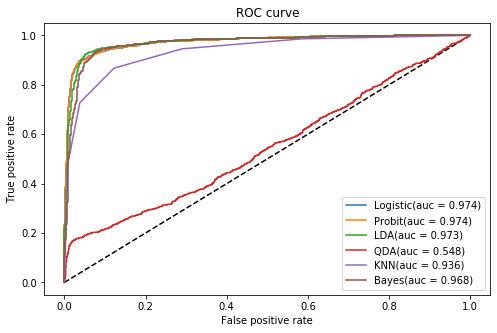

In [25]:
fig=plt.figure(figsize=(8,5))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logistic,tpr_logistic,label="Logistic(auc = %0.3f)" % area_logistic)
plt.plot(fpr_probit,tpr_probit,label="Probit(auc = %0.3f)" % area_probit)
plt.plot(fpr_lda,tpr_lda,label="LDA(auc = %0.3f)" % area_lda)
plt.plot(fpr_qda,tpr_qda,label="QDA(auc = %0.3f)" % area_qda)
plt.plot(fpr_knn,tpr_knn,label="KNN(auc = %0.3f)" % area_knn)
plt.plot(fpr_bayes,tpr_bayes,label="Bayes(auc = %0.3f)" % area_bayes)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

# 特征选择及降维

## 最优子集

In [76]:
import numpy as np
from scipy import linalg
from scipy.stats import norm
import random

def turnbits_rec(p):
    if (p == 1):
        return np.array([[True, False], [True, True]])
    else:
        tmp1 = np.c_[turnbits_rec(p - 1),
                     np.array([False] * (2**(p - 1))).reshape((2**(p - 1), 1))]
        tmp2 = np.c_[turnbits_rec(p - 1),
                     np.array([True] * (2**(p - 1))).reshape((2**(p - 1), 1))]
        return np.r_[tmp1, tmp2]

def mse(xtx_t, xty_t, beta):
    return (np.sum(np.dot(xtx_t, beta) * beta) - 2 * np.sum(xty_t * beta))

def solve_sym(xtx, xty):
    L = linalg.cholesky(xtx)
    return linalg.lapack.dpotrs(L, xty)[0]

In [77]:
class BestSubsetReg(object):
    def __init__(self, x, y, inter=True, isCp=True, isAIC=True, isCV=True):
        self.__n, self.__p = x.shape
        if inter:
            self.__x = np.c_[np.ones((self.__n, 1)), x]
            self.__ind_var = turnbits_rec(self.__p)
        else:
            self.__x = x
            self.__ind_var = turnbits_rec(self.__p)[:, 1:]
        self.__y = y
        self.__xTx = np.dot(self.__x.T, self.__x)
        self.__xTy = np.dot(self.__x.T, self.__y)
        self.__b = [
            solve_sym(self.__xTx[ind][:, ind], self.__xTy[ind])
            for ind in self.__ind_var
        ]
        self.__isCp = isCp
        self.__isAIC = isAIC
        self.__isCV = isCV

    def __Cp_AIC(self):
        rss = np.dot(self.__y, self.__y) - [
            np.sum(np.dot(self.__xTx[ind][:, ind], b_) * b_)
            for ind, b_ in zip(self.__ind_var, self.__b)
        ]
        d = np.sum(self.__ind_var, axis=1)
        if self.__isCp:
            self.Cp = rss + 2 * d * rss[-1] / (self.__n - self.__p - 1)
        if self.__isAIC:
            self.AIC = self.__n * np.log(rss) + 2 * d

    def __cvreg(self):
        K = 10
        indexs = np.array_split(np.random.permutation(np.arange(0, self.__n)), K)

        def cvk(ind, index):
            txx = self.__xTx[ind][:, ind] - np.dot(
                (self.__x[index][:, ind]).T, self.__x[index][:, ind])
            txy = self.__xTy[ind] - np.dot(
                (self.__x[index][:, ind]).T, self.__y[index])
            tcoe = solve_sym(txx, txy)
            return np.sum(
                (self.__y[index] - np.dot(self.__x[index][:, ind], tcoe))**2)

        self.cverr = np.sum(np.array([[cvk(ind, index) for index in indexs]
                                      for ind in self.__ind_var]),
                            axis=1) / self.__n

    def output(self, isPrint=True):
        """
        If inter=True, first item is intercept, Otherwise it is X1. 
        If print=False, save results only and do not print.
        """
        if self.__isCp | self.__isAIC:
            self.__Cp_AIC()
            if self.__isCp:
                min_id = np.argmin(self.Cp)
                self.Cp = [self.__ind_var[min_id][0:], self.__b[min_id]]
                if isPrint:
                    print("Cp：\nVariable：", self.Cp[0])
                    print("Coefficient：", self.Cp[1])
            if self.__isAIC:
                min_id = np.argmin(self.AIC)
                self.AIC = [self.__ind_var[min_id][0:], self.__b[min_id]]
                if isPrint:
                    print("AIC：\nVariable：", self.AIC[0])
                    print("Coefficient：", self.AIC[1])
        if self.__isCV:
            self.__cvreg()
            min_id = np.argmin(self.cverr)
            self.cverr = [self.__ind_var[min_id][0:], self.__b[min_id]]
            if isPrint:
                print("Cross Validation：\nVariable：", self.cverr[0])
                print("Coefficient：", self.cverr[1])

In [78]:
# 使用python自带的波士顿房价数据集
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print("样本的个数 = {},特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
X=scaler.transform(X)
# 导入最优子集回归模型并进行训练
model_subset = BestSubsetReg(x=X, y=y)
# 输出子集选择结果
model_subset.output()
model_subset.Cp

样本的个数 = 506,特征的个数 = 13
Cp：
Variable： [ True  True  True False  True  True  True False  True  True  True  True
  True  True]
Coefficient： [22.53280632 -0.93160036  1.06815915  0.68985505 -2.01150261  2.66841378
 -3.14011016  2.60618941 -1.98306322 -2.04714825  0.84736785 -3.72789722]
AIC：
Variable： [ True  True  True False  True  True  True False  True  True  True  True
  True  True]
Coefficient： [22.53280632 -0.93160036  1.06815915  0.68985505 -2.01150261  2.66841378
 -3.14011016  2.60618941 -1.98306322 -2.04714825  0.84736785 -3.72789722]
Cross Validation：
Variable： [ True  True  True False  True  True  True False  True  True  True  True
  True  True]
Coefficient： [22.53280632 -0.93160036  1.06815915  0.68985505 -2.01150261  2.66841378
 -3.14011016  2.60618941 -1.98306322 -2.04714825  0.84736785 -3.72789722]


[array([ True,  True,  True, False,  True,  True,  True, False,  True,
         True,  True,  True,  True,  True]),
 array([22.53280632, -0.93160036,  1.06815915,  0.68985505, -2.01150261,
         2.66841378, -3.14011016,  2.60618941, -1.98306322, -2.04714825,
         0.84736785, -3.72789722])]

## 岭回归：Ridge

In [26]:
# 使用python自带的波士顿房价数据集
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print("样本的个数 = {},特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 506,特征的个数 = 13


In [27]:
# 导入岭回归函数
from sklearn.linear_model import Ridge
model_ridge=Ridge(alpha=0.5)  # 模型实例化
# 模型训练及预测
model_ridge=model_ridge.fit(X_train,y_train)
y_pred=model_ridge.predict(X_test)
# 模型评价：采用MSE和R^2来进行评价
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("岭回归模型拟合的均方误差为:{}".format(round(MSE,3)))
print("岭回归可以解释原变量%.3f%%的信息"% (r2 *100))
# 查看各变量的系数
print("各变量的系数为:\n",model_ridge.coef_)

岭回归模型拟合的均方误差为:24.77
岭回归可以解释原变量60.464%的信息
各变量的系数为:
 [-0.87661291  0.94946098  0.38801763  0.2961452  -1.7725836   3.10616001
 -0.01613174 -2.88171978  2.3796612  -2.05736629 -2.0040423   0.60486402
 -3.92557963]


## Lasso回归

In [28]:
# 使用python自带的波士顿房价数据集
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print("样本的个数 = {},特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 506,特征的个数 = 13


In [29]:
# 导入Lasso回归函数
from sklearn.linear_model import Lasso
model_lasso=Lasso(alpha=0.1)  # 模型实例化
# 模型训练及预测
model_lasso=model_lasso.fit(X_train,y_train)
y_pred=model_lasso.predict(X_test)
# 模型评价：采用MSE和R^2来进行评价
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Lasso回归模型拟合的均方误差为:{}".format(round(MSE,3)))
print("Lasso回归可以解释原变量%.3f%%的信息"% (r2 *100))
# 查看各变量的系数
print("各变量的系数为:\n",model_lasso.coef_)

Lasso回归模型拟合的均方误差为:26.114
Lasso回归可以解释原变量56.578%的信息
各变量的系数为:
 [-0.59635319  0.61150794 -0.          0.26879248 -1.2058338   3.22791697
 -0.         -2.25261646  0.95094981 -0.80891399 -1.83453419  0.47667922
 -3.93031518]


## 弹性网：Elastic-Net

In [30]:
# 使用python自带的波士顿房价数据集
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print("样本的个数 = {},特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 506,特征的个数 = 13


In [31]:
# 导入弹性网函数
from sklearn.linear_model import ElasticNet
model_elastic=ElasticNet()  # 模型实例化
# 模型训练及预测
model_elastic=model_elastic.fit(X_train,y_train)
y_pred=model_elastic.predict(X_test)
# 模型评价：采用MSE和R^2来进行评价
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("Elastic_Net模型拟合的均方误差为:{}".format(round(MSE,3)))
print("Elastic_Net可以解释原变量%.3f%%的信息"% (r2 *100))
# 查看各变量的系数
print("各变量的系数为:\n",model_elastic.coef_)

Elastic_Net模型拟合的均方误差为:31.899
Elastic_Net可以解释原变量3.574%的信息
各变量的系数为:
 [-0.36754177  0.04144601 -0.26162353  0.09944001 -0.19657701  2.57774603
 -0.         -0.         -0.         -0.39236921 -1.25194015  0.31277891
 -2.3950601 ]


## 自适应Lasso：Adaptive Lasso

In [74]:
def Adaptive_LASSO(X_train,y_train,max_iterations = 1000,lasso_iterations = 10, alpha = 0.1, tol = 0.001, max_error_up = 5, title = ''):
    
    from sklearn.linear_model import Lasso
    # set checks
    higher  = float('inf')
    lower   = 0
    
    # set lists
    coefficients_list = []
    iterations_list   = []
    
    # set variables
    X_train  = X_train
    y_train  = y_train
    
    # set constants
    alpha    = alpha
    tol      = tol
    max_iter = max_iterations
    n_lasso_iterations = lasso_iterations
    
    g = lambda w: np.sqrt(np.abs(w))
    gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

    n_samples, n_features = X_train.shape
    p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y_train - np.dot(X_train, w)) ** 2) \
                      + alpha * np.sum(g(w))

    weights = np.ones(n_features)

    X_w = X_train / weights[np.newaxis, :]
    X_w  = np.nan_to_num(X_w)
    X_w  = np.round(X_w,decimals = 3)

    y_train    = np.nan_to_num(y_train)

    adaptive_lasso = Lasso(alpha=alpha, fit_intercept=False)

    adaptive_lasso.fit(X_w, y_train)

    for k in range(n_lasso_iterations):
        X_w = X_train / weights[np.newaxis, :]
        adaptive_lasso = Lasso(alpha=alpha, fit_intercept=False)
        adaptive_lasso.fit(X_w, y_train)
        coef_ = adaptive_lasso.coef_ / weights
        weights = gprime(coef_)
        
        print ('Iteration #',k+1,':   ',p_obj(coef_))  # should go down
        
        iterations_list.append(k)
        coefficients_list.append(p_obj(coef_))
        
    print (np.mean((adaptive_lasso.coef_ != 0.0) == (coef_ != 0.0)))   
    
    coef = pd.Series(adaptive_lasso.coef_, index = X_train.columns)
    print('=============================================================================')
    print("Adaptive LASSO picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")
    print('=============================================================================')

    plt.rcParams["figure.figsize"] = (10,5)
    plt.figure()
    # subplot of the predicted vs. actual
    plt.subplot(1,2,1)
    plt.plot(iterations_list,coefficients_list,color = 'orange')
    plt.scatter(iterations_list,coefficients_list,color = 'green')
    plt.title('Iterations vs. p_obj(coef_)')

    # plot of the coefficients'
    plt.subplot(1,2,2)
    imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
    imp_coef.plot(kind = "barh", color = 'green',  fontsize=14)
    plt.title("Coefficients Selected by the Adaptive LASSO Model", fontsize = 14)
    plt.show()
    return adaptive_lasso

Iteration # 1 :    264.20608057659007
Iteration # 2 :    264.1454183301053
Iteration # 3 :    264.1434144508424
Iteration # 4 :    264.14335384316723
Iteration # 5 :    264.1433519584512
Iteration # 6 :    264.1433519061564
Iteration # 7 :    264.14335190824914
Iteration # 8 :    264.14335190925414
1.0
Adaptive LASSO picked 11 variables and eliminated the other 2 variables.


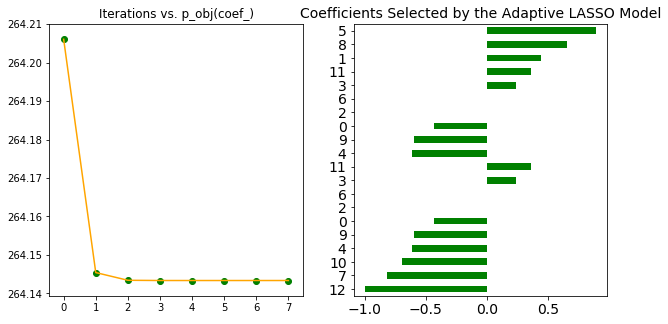

In [75]:
X_train=pd.DataFrame(X_train)
model_lasso=Adaptive_LASSO(X_train,y_train,lasso_iterations=8)

In [ ]:
# variable selection with LASSO for the model

#y_train = numbers_df['y']
#X_train = numbers_df[[col for col in numbers_df.columns if col != 'y']]

#model = Adaptive_LASSO(X_train,
#                       y_train,
#                       max_iterations = 1000,
#                       lasso_iterations = 10, 
#                       alpha = 0.1, 
#                       tol = 0.001, 
#                       max_error_up = 5, 
#                       title = '')

# look at the coefficients in the model

#coef = pd.Series(model.coef_, index = X_train.columns)
#coef = pd.DataFrame(coef).reset_index()
#coef_list = coef.loc[coef[0]!= 0.0]['index'].to_list()
#new_X_train = X_train[coef_list]

## SCAD

## 主成分分析：PCA

In [1]:
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)

In [4]:
dir(load_breast_cancer())

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [8]:
load_breast_cancer().feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [27]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {},     变量的个数 = {}".format(X.shape[0],X.shape[1]))
# 将特征数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
X=scaler.transform(X)
# 导入PCA函数
from sklearn.decomposition import PCA
# 进行主成分降维，并比较在不同主成分个数的情况下的方差累计贡献率
for i in range(1,11):
    pca=PCA(n_components=i)
    pca.fit(X)
    variance_ratio=pca.explained_variance_ratio_
    print(i,"个主成分可以解释原变量%.3f%%的信息"% (np.sum(variance_ratio) *100))

样本的个数 = 569,     变量的个数 = 30
1 个主成分可以解释原变量44.272%的信息
2 个主成分可以解释原变量63.243%的信息
3 个主成分可以解释原变量72.636%的信息
4 个主成分可以解释原变量79.239%的信息
5 个主成分可以解释原变量84.734%的信息
6 个主成分可以解释原变量88.759%的信息
7 个主成分可以解释原变量91.010%的信息
8 个主成分可以解释原变量92.598%的信息
9 个主成分可以解释原变量93.988%的信息
10 个主成分可以解释原变量95.157%的信息


# 决策树

## ID3决策树

In [21]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入决策树函数,criterion设为信息增益
from sklearn.tree import DecisionTreeClassifier
model18=DecisionTreeClassifier(criterion='entropy')
# 模型训练及预测
model18=model18.fit(X_train,y_train)
y_pred=model18.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("ID3决策树模型拟合的准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
ID3决策树模型拟合的准确率为:97.203%


## C4.5决策树

## CART决策树

In [22]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入决策树函数,criterion设为基尼系数
from sklearn.tree import DecisionTreeClassifier
model20=DecisionTreeClassifier(criterion='gini')
# 模型训练及预测
model20=model20.fit(X_train,y_train)
y_pred=model20.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("CART决策树模型拟合的准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
CART决策树模型拟合的准确率为:97.203%


In [10]:
from rpy2.robjects import r
from rpy2.robjects.packages import importr
importr('rpart')
importr('rpart.plot')

RRuntimeError: 

In [11]:
#importr('rpart.plot')
r['install.packages']('rpart.plot')

RRuntimeError: 

In [16]:
# 通过python程序调用R自带的iris数据集
data_sample="""
#使用R自带的iris数据集
data=iris
head(iris)
# 通过留出法划分数据集
set.seed(123)
train_index=sample(nrow(data),0.7*nrow(data))
train_data=data[train_index,]
test_data=data[-train_index,]
"""
# 通过调用rpy2包，用python执行R程序
r(data_sample)
# 将y_true 数据格式转化为np.array
y_true=np.array(r("test_data$Species"))

## ID3决策树

### ID3决策树未剪枝

In [1]:
# 导入ID3决策树需要的函数包
from rpy2.robjects import r
from rpy2.robjects.packages import importr
importr('rpart')
importr('rpart.plot')
ID3_tree="""
ID3_tree=rpart(train_data$Species~.,data=train_data,method="class",
               parms=list(split="information"),minsplit=0)
rpart.plot(ID3_tree,branch=1,type=2, fallen.leaves=T,cex=0.8, sub="ID3—未剪枝")
pred_ID3_tree=predict(ID3_tree,test_data,type='class')
"""
# 通过python执行R中的ID3决策树程序
r(ID3_tree)
# 导出ID3决策树（未剪枝）的预测值，并转换为np.array格式
y_pred_ID3=np.array(r("pred_ID3_tree"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_ID3,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_ID3,y_true)
print("ID3决策树（未剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

NameError: name 'importr' is not defined

### ID3决策树（预剪枝）

In [22]:
# 导入ID3决策树需要的函数包
importr('rpart')
importr('rpart.plot')
ID3_tree_pre="""
 # 将每个叶节点最小样本数设为20
ID3_tree_pre=rpart(train_data$Species~.,data=train_data,method="class",
               parms=list(split="information"),minsplit=20)
rpart.plot(ID3_tree_pre,branch=1,type=2, fallen.leaves=T,cex=0.8, sub="ID3—预剪枝")
pred_ID3_tree_pre=predict(ID3_tree_pre,test_data,type='class')
"""
# 通过python执行R中的ID3决策树程序
r(ID3_tree_pre)
# 导出ID3决策树（预剪枝）的预测值，并转换为np.array格式
y_pred_ID3_pre=np.array(r("pred_ID3_tree_pre"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_ID3_pre,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_ID3_pre,y_true)
print("ID3决策树（预剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.95      0.97        19
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

ID3决策树（预剪枝）拟合的准确率为:97.778%


### ID3决策树（后剪枝）

In [29]:
# 导入ID3决策树需要的函数包
importr('rpart')
importr('rpart.plot')
ID3_tree_after="""
#后剪枝，将CP值设为0.1
ID3_tree_after<-prune(ID3_tree,cp=0.1)
rpart.plot(ID3_tree_after,branch=1,type=2, fallen.leaves=T,cex=0.8, sub="ID3—后剪枝")
pred_ID3_tree_after=predict(ID3_tree_after,test_data,type='class')
"""
# 通过python执行R中的ID3决策树程序
r(ID3_tree_after)
# 导出ID3决策树（后剪枝）的预测值，并转换为np.array格式
y_pred_ID3_after=np.array(r("pred_ID3_tree_after"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_ID3_after,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_ID3_after,y_true)
print("ID3决策树（后剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.95      0.97        19
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

ID3决策树（后剪枝）拟合的准确率为:97.778%


## C4.5决策树

### C4.5决策树：未剪枝

In [35]:
# 导入C4.5决策树需要的函数包
importr('RWeka')
importr('partykit')
C4_5_tree="""
 # 将每个叶节点最小样本数设为20
C4_5_tree=J48(factor(train_data$Species)~.,data=train_data,control=Weka_control(M=2))
plot(C4_5_tree,main="C4.5—未剪枝")
pred_C4_5_tree=predict(C4_5_tree,test_data,type='class')
"""
# 通过python执行R中的C4.5决策树程序
r(C4_5_tree)
# 导出C4.5决策树（未剪枝）的预测值，并转换为np.array格式
y_pred_C4_5=np.array(r("pred_C4_5_tree"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_C4_5,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_C4_5,y_true)
print("C4.5决策树（未剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      1.00      0.97        17
           3       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

C4.5决策树（未剪枝）拟合的准确率为:97.778%


### C4.5决策树：预剪枝

In [36]:
# 导入C4.5决策树需要的函数包
importr('RWeka')
importr('partykit')
C4_5_tree_pre="""
#预剪枝
C4_5_tree_pre=J48(factor(train_data$Species)~.,data=train_data,
                  control=Weka_control(U=T,M=5))
plot(C4_5_tree_pre,main="C4.5—预剪枝")
pred_C4_5_tree_pre=predict(C4_5_tree_pre,test_data,type='class')
"""
# 通过python执行R中的C4.5决策树程序
r(C4_5_tree_pre)
# 导出C4.5决策树（预剪枝）的预测值，并转换为np.array格式
y_pred_C4_5_pre=np.array(r("pred_C4_5_tree_pre"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_C4_5_pre,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_C4_5_pre,y_true)
print("C4.5决策树（预剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.89      0.94      0.91        17
           3       0.92      0.86      0.89        14

    accuracy                           0.93        45
   macro avg       0.94      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45

C4.5决策树（预剪枝）拟合的准确率为:93.333%


## CART决策树

### CART决策树：未剪枝

In [37]:
# 导入CART决策树需要的函数包
importr('rpart')
importr('rpart.plot')
CART_tree="""
CART_tree=rpart(train_data$Species~.,data=train_data,method="class",
               parms=list(split="gini"),minsplit=0)
rpart.plot(CART_tree,branch=1,type=2, fallen.leaves=T,cex=0.8, sub="CART—未剪枝")
pred_CART_tree=predict(CART_tree,test_data,type='class')
"""
# 通过python执行R中的CART决策树程序
r(CART_tree)
# 导出CART决策树（未剪枝）的预测值，并转换为np.array格式
y_pred_CART=np.array(r("pred_CART_tree"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_CART,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_CART,y_true)
print("CART决策树（未剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.89      1.00      0.94        16
           3       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

CART决策树（未剪枝）拟合的准确率为:95.556%


### CART决策树：预剪枝

In [38]:
# 导入CART决策树需要的函数包
importr('rpart')
importr('rpart.plot')
CART_tree_pre="""
#将每个叶节点最小样本数设为20
CART_tree_pre=rpart(train_data$Species~.,data=train_data,method="class",
               parms=list(split="gini"),minsplit=20)
rpart.plot(CART_tree_pre,branch=1,type=2, fallen.leaves=T,cex=0.8, sub="CART—预剪枝")
pred_CART_tree_pre=predict(CART_tree_pre,test_data,type='class')
"""
# 通过python执行R中的CART决策树程序
r(CART_tree_pre)
# 导出CART决策树（预剪枝）的预测值，并转换为np.array格式
y_pred_CART_pre=np.array(r("pred_CART_tree_pre"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_CART_pre,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_CART_pre,y_true)
print("CART决策树（预剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.95      0.97        19
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

CART决策树（预剪枝）拟合的准确率为:97.778%


### CART决策树：后剪枝

In [39]:
# 导入CART决策树需要的函数包
importr('rpart')
importr('rpart.plot')
CART_tree_after="""
#后剪枝，将CP值设为0.1
CART_tree_after<-prune(CART_tree,cp=0.1)
rpart.plot(CART_tree_after,branch=1,type=2, fallen.leaves=T,cex=0.8, sub="CART—后剪枝")
pred_CART_tree_after=predict(CART_tree_after,test_data,type='class')
"""
# 通过python执行R中的CART决策树程序
r(CART_tree_after)
# 导出CART决策树（后剪枝）的预测值，并转换为np.array格式
y_pred_CART_after=np.array(r("pred_CART_tree_after"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_CART_after,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_CART_after,y_true)
print("CART决策树（后剪枝）拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      0.95      0.97        19
           3       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

CART决策树（后剪枝）拟合的准确率为:97.778%


## C5.0决策树

In [43]:
# 导入C5.0决策树需要的函数包
importr('C50')
C50_tree="""
C50_tree=C5.0(x=train_data[,-5],y=factor(train_data$Species))
plot(C50_tree,main="C5.0决策树")
pred_C50_tree=predict(C50_tree,test_data,type='class')
"""
# 通过python执行R中的C5.0决策树程序
r(C50_tree)
# 导出C5.0决策树的预测值，并转换为np.array格式
y_pred_C50=np.array(r("pred_C50_tree"))
# 模型评价
from sklearn.metrics import classification_report
print(classification_report(y_pred_C50,y_true))
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred_C50,y_true)
print("C5.0决策树拟合的准确率为:%.3f%%"% (Acc *100))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       0.94      1.00      0.97        17
           3       1.00      0.93      0.96        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

C5.0决策树拟合的准确率为:97.778%


# 支持向量机：SVM

## 线性支持向量机

In [32]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [33]:
# 导入支持向量机函数：核函数为线性核
from sklearn.svm import SVC
model12=SVC(kernel='linear')
# 模型训练及预测
model12=model12.fit(X_train,y_train)
y_pred=model12.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("线性支持向量机模型拟合的准确率为:%.3f%%"% (Acc *100))

线性支持向量机模型拟合的准确率为:98.601%


## 核支持向量机（RBF核）

In [ ]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [34]:
# 导入支持向量机函数：核函数为RBF核
from sklearn.svm import SVC
model13=SVC(kernel='rbf')
# 模型训练及预测
model13=model13.fit(X_train,y_train)
y_pred=model13.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("RBF核支持向量机模型拟合的准确率为:%.3f%%"% (Acc *100))

RBF核支持向量机模型拟合的准确率为:98.601%


# 神经网络

## BP神经网络

In [1]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [ ]:
# 导入定义神经网络所需的函数
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
# 自定义三层神经网络模型
model = Sequential([
    Dense(64, input_dim=30,activation="relu"),
    Dense(32,activation="relu"),
    Dense(1,activation="sigmoid")
])
print(model.summary())
# 模型编译
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
# 模型训练及评价
model.fit(X_train, y_train,epochs=500,batch_size=32,verbose=0)
loss,Acc= model.evaluate(X_test, y_test, batch_size=32)
print("BP神经网络模型拟合的准确率为:%.3f%%"% (Acc *100))

Using TensorFlow backend.


## RBF神经网络

In [2]:
from keras.layers import Layer
from keras import backend as K
# 自定义RBF激活函数
class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [6]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 自定义二层RBF神经网络
model = Sequential()
model.add(Dense(16, input_shape=(30,)))
model.add(RBFLayer(16,0.5))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())
# 模型编译
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
# 模型训练及评价
model.fit(X_train, y_train,epochs=500,batch_size=32,verbose=0)
loss,Acc= model.evaluate(X_test, y_test, batch_size=32)
print("RBF神经网络模型拟合的准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 16)                496       
_________________________________________________________________
rbf_layer_4 (RBFLayer)       (None, 16)                256       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________
None
143/143 [==============================] - 0s 480us/step
RBF神经网络模型拟合的准确率为:99.301%


In [3]:
from scipy import *
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt
from numpy import exp

class RBF(object):
     
    def __init__(self, indim, nhiddens, outdim):
        self.indim = indim
        self.outdim = outdim
        self.nhiddens = nhiddens
        self.centers = [random.uniform(-1, 1, indim) for i in range(nhiddens)]
        self.beta = 8
        self.W = random.random((self.nhiddens, self.outdim))
         
    def _basisfunc(self, c, d):
        assert len(d) == self.indim
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = zeros((X.shape[0], self.nhiddens), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
     
    def train(self, X, Y):
        """ X: matrix of dimensions n x indim 
            y: column vector of dimension n x 1 """
         
        # choose random center vectors from training set
        random.seed(10)
#        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
#        self.centers = [X[i,:] for i in rnd_idx]
        self.centers = X[random.choice(X.shape[0],self.nhiddens)]
        
#        print ("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
#        print ('G \n',G)
         
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)
        return self.centers, G 
         
    def test(self, X):
        """ X: matrix of dimensions n x indim """
         
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y

In [ ]:
 
if __name__ == '__main__':
    # rbf regression
    rbf = RBF(1, 10, 1)
    center, G = rbf.train(x, y)
    z = rbf.test(x)
       
    # plot original data
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, 'k-')
     
    # plot learned model
    plt.plot(x, z, 'r-', linewidth=2)
#     
    # plot rbfs
    plt.plot(rbf.centers, zeros(rbf.numCenters), 'gs')
     
    for c in rbf.centers:
        # RF prediction lines
        cx = arange(c-0.7, c+0.7, 0.01)
        cy = [rbf._basisfunc(array([cx_]), array([c])) for cx_ in cx]
        plt.plot(cx, cy, '-', color='gray', linewidth=0.2)
     
    plt.xlim(-1.2, 1.2)
    plt.show()

In [8]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入RBF神经网络模型
model_rbf=RBF(30,15,1)
center,G=model_rbf.train(X_train,y_train)
y_pred=model_rbf.test(X_train)
print(y_pred.astype(int))

样本的个数 = 569, 特征的个数 = 30


D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


D:\Users\kw\Anaconda3\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: scipy.dot is deprecated and will be removed in SciPy 2.0.0, use numpy.dot instead


In [9]:
from keras import backend as K
from keras.engine.topology import Layer
from keras.initializers import RandomUniform, Initializer, Constant
import numpy as np

class InitCentersRandom(Initializer):
    """ Initializer for initialization of centers of RBF network
        as random samples from the given data set.
    # Arguments
        X: matrix, dataset to choose the centers from (random rows
          are taken as centers)
    """

    def __init__(self, X):
        self.X = X

    def __call__(self, shape, dtype=None):
        assert shape[1] == self.X.shape[1]
        idx = np.random.randint(self.X.shape[0], size=shape[0])
        return self.X[idx, :]


class RBFLayer(Layer):
    """ Layer of Gaussian RBF units.
    # Arguments
        output_dim: number of hidden units (i.e. number of outputs of the
                    layer)
        initializer: instance of initiliazer to initialize centers
        betas: float, initial value for betas
    """

    def __init__(self, output_dim, initializer=None, betas=1.0, **kwargs):
        self.output_dim = output_dim
        self.init_betas = betas
        if not initializer:
            self.initializer = RandomUniform(0.0, 1.0)
        else:
            self.initializer = initializer
        super(RBFLayer, self).__init__(**kwargs)

    def build(self, input_shape):

        self.centers = self.add_weight(name='centers',
                                       shape=(self.output_dim, input_shape[1]),
                                       initializer=self.initializer,
                                       trainable=True)
        self.betas = self.add_weight(name='betas',
                                     shape=(self.output_dim,),
                                     initializer=Constant(
                                         value=self.init_betas),
                                     # initializer='ones',
                                     trainable=True)

        super(RBFLayer, self).build(input_shape)

    def call(self, x):

        C = K.expand_dims(self.centers)
        H = K.transpose(C-K.transpose(x))
        return K.exp(-self.betas * K.sum(H**2, axis=1))

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

    def get_config(self):
        # have to define get_config to be able to use model_from_json
        config = {
            'output_dim': self.output_dim
        }
        base_config = super(RBFLayer, self).get_config()
        return dict(list(base_config.items()) + list(config.items()))

Using TensorFlow backend.


In [22]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
model=Sequential()
model.add(RBFLayer(10,betas=8.0,input_shape=(30,),initializer=InitCentersRandom(X_train)))
model.add(Dense(1,activation="sigmoid"))
print(model.summary())
# 模型编译
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
# 模型训练及评价
model.fit(X_train, y_train,epochs=200,batch_size=32,verbose=0)
y_pred=model.predict(X_test)
#loss,Acc= model.evaluate(X_test, y_test, batch_size=32)
#print("BP神经网络模型拟合的准确率为:%.3f%%"% (Acc *100))


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rbf_layer_22 (RBFLayer)      (None, 10)                310       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None


## GRNN

In [24]:
import numpy as np
import pandas as pd

# 自定义广义回归神经网络模型（GRNN）
class GRNN(object):
    def __init__(self,X_train,y_train,X_test,y_test):
        self.x_train= X_train
        self.y_train= y_train
        self.x_test= X_test
        self.y_test= y_test
        #np.random.rand(1,self.train_y.size) #Standard deviations(std) are sometimes called RBF widths.
        self.std = np.ones((1,self.y_train.size))
        
    def activation_func(self,distances): # gaussian kernel        
        return np.exp(- (distances**2) / 2*(self.std**2) )

    def output(self,i):#sometimes called weight
        distances=np.sqrt(np.sum((self.x_test[i]-self.x_train)**2,axis=1)) # euclidean distance        
        return self.activation_func(distances)
   
    def denominator(self,i):
        return np.sum(self.output(i))

    def numerator(self,i): 
        return  np.sum(self.output(i) * self.y_train)
    
    def predict(self):
        predict_array = np.array([])
        for i in range(self.y_test.size):
            predict=np.array([self.numerator(i)/self.denominator(i)])
            predict_array=np.append(predict_array,predict)        
        return predict_array
    
    def squared_error(self):
        return (self.predict()-self.y_test)**2 
    
    def root_squared_error(self):
        return np.sqrt(self.squared_error())

In [42]:
# 使用python自带的波士顿房价数据集
from sklearn.datasets import load_boston
X,y=load_boston(return_X_y=True)
print("样本的个数 = {},特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入自定义的GRNN，并进行训练和预测
model_grnn=GRNN(X_train,y_train,X_test,y_test)
y_pred=model_grnn.predict()
# 模型评价
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE=mean_squared_error(y_pred,y_test)
r2=r2_score(y_pred,y_test)
print("GRNN模型拟合的均方误差为:{}".format(round(MSE,3)))
print("GRNN模型自定义的MSE为:%.3f"%(np.mean(model_grnn.squared_error())))
print("GRNN可以解释原变量%.3f%%的信息"% (r2 *100))

样本的个数 = 506,特征的个数 = 13
GRNN模型拟合的均方误差为:23.402
GRNN模型自定义的MSE为:23.402
GRNN可以解释原变量53.297%的信息


# 聚类分析

## K-Means聚类

样本的个数 = 150, 特征的个数 = 4
特征描述：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
K-Means同质性得分为:0.751


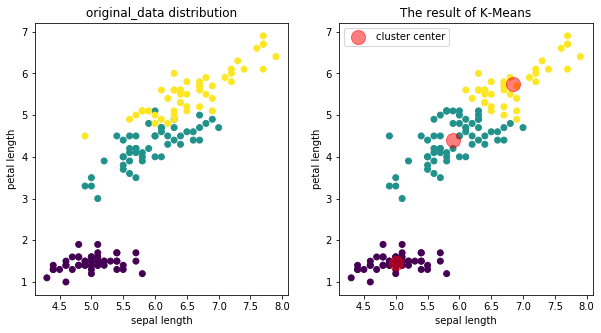

In [138]:
# 使用python自带的鸢尾花数据集（三分类）
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
print("特征描述：{}".format(load_iris().feature_names))
# 画出sepal、petal length特征的分布图
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,2],c=y)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('original_data distribution')
# 进行K-Means聚类分析
from sklearn.cluster import KMeans
model_kmeans=KMeans(n_clusters=3)
model_kmeans=model_kmeans.fit(X)
y_kmeans=model_kmeans.labels_
# 聚类结果评价：同质性得分
from sklearn.metrics.cluster import homogeneity_score
score=homogeneity_score(y,y_kmeans)
print("K-Means同质性得分为:{}".format(round(score,3)))
# 画出聚类后的结果
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,2],c=y_kmeans)
centers=model_kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,2],c="red",s=200,alpha=0.5,label="cluster center")
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('The result of K-Means')
plt.legend(loc='best')
plt.show()

## 系统聚类

In [121]:
from scipy.cluster.hierarchy import dendrogram
# 定义谱系图
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

样本的个数 = 150, 特征的个数 = 4
特征描述：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
系统聚类同质性得分为:1.0


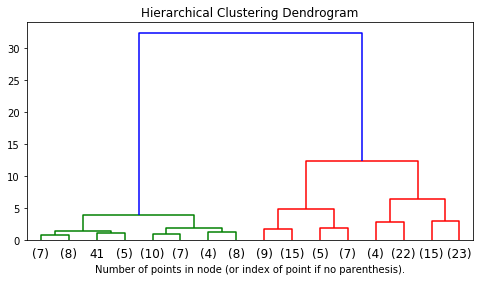

In [139]:
# 使用python自带的鸢尾花数据集（三分类）
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
print("特征描述：{}".format(load_iris().feature_names))
# 导入系统聚类模型并训练
from sklearn.cluster import AgglomerativeClustering
model_Aggcluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model_Aggcluster= model_Aggcluster.fit(X)
y_aggcluster=model_Aggcluster.labels_
# 聚类结果评价：同质性得分
from sklearn.metrics.cluster import homogeneity_score
score=homogeneity_score(y,y_aggcluster)
print("系统聚类同质性得分为:{}".format(round(score,3)))
# 根据聚类结果画出谱系图
plt.figure(figsize=(8,4))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model_Aggcluster, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## 密度聚类

样本的个数 = 150, 特征的个数 = 4
特征描述：['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Estimated number of clusters: 2
Estimated number of noise points: 13
K-Means同质性得分为:0.563


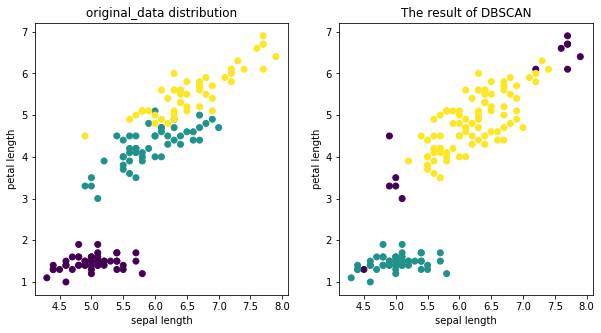

In [143]:
# 使用python自带的鸢尾花数据集（三分类）
from sklearn.datasets import load_iris
X,y=load_iris(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
print("特征描述：{}".format(load_iris().feature_names))
# 画出sepal、petal length特征的分布图
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,2],c=y)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('original_data distribution')
# 进行K-Means聚类分析
from sklearn.cluster import DBSCAN
model_dbscan=DBSCAN(eps=0.6, min_samples=10).fit(X)
y_dbscan=model_dbscan.labels_
core_samples_mask = np.zeros_like(y_dbscan, dtype=bool)
core_samples_mask[model_dbscan.core_sample_indices_] = True
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_noise_ = list(y_dbscan).count(-1)
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# 聚类结果评价：同质性得分
from sklearn.metrics.cluster import homogeneity_score
score=homogeneity_score(y,y_dbscan)
print("K-Means同质性得分为:{}".format(round(score,3)))
# 画出聚类后的结果
plt.subplot(1,2,2)
plt.scatter(X[:,0],X[:,2],c=y_dbscan)
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('The result of DBSCAN')
plt.show()

# 集成学习

## 随机森林：Random Forest

In [5]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))

# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入随机森林函数,使用二十棵决策树进行集成
from sklearn.ensemble import RandomForestClassifier
model13=RandomForestClassifier(n_estimators=20)
# 模型训练及预测
model13=model13.fit(X_train,y_train)
y_pred=model13.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("随机森林模型拟合的准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
随机森林模型拟合的准确率为:99.301%


## Bagging

In [20]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入BaggingClassifier函数,使用20棵决策树作为基分类器
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
model17=BaggingClassifier(base_estimator=DecisionTreeClassifier(),n_estimators=20)
# 模型训练及预测
model17=model17.fit(X_train,y_train)
y_pred=model17.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("Bagging模型拟合的准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
Bagging模型拟合的准确率为:98.601%


## AdaBoost

In [8]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入AdaBoost函数,使用20棵决策树
from sklearn.ensemble import AdaBoostClassifier
model14=AdaBoostClassifier(n_estimators=20)
# 模型训练及预测
model14=model14.fit(X_train,y_train)
y_pred=model14.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("AdaBoost模型拟合的准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
AdaBoost模型拟合的准确率为:96.503%


## GBDT

In [9]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))

# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
# 导入GBDT函数：使用20棵决策树
from sklearn.ensemble import GradientBoostingClassifier
model15=GradientBoostingClassifier(n_estimators=20)
# 模型训练及预测
model15=model15.fit(X_train,y_train)
y_pred=model15.predict(X_test)
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("GBDT模型拟合的准确率为:%.3f%%"% (Acc *100))

样本的个数 = 569, 特征的个数 = 30
GBDT模型拟合的准确率为:97.902%


## XGBoost

### 优点
1. 精度更高：GBDT 只用到一阶泰勒展开，而 XGBoost 对损失函数进行了二阶泰勒展开。XGBoost 引入二阶导一方面是为了增加精度，另一方面也是为了能够自定义损失函数，二阶泰勒展开可以近似大量损失函数；
2. 灵活性更强：GBDT 以 CART 作为基分类器，XGBoost 不仅支持 CART 还支持线性分类器，使用线性分类器的 XGBoost 相当于带 和 正则化项的逻辑斯蒂回归（分类问题）或者线性回归（回归问题）。此外，XGBoost 工具支持自定义损失函数，只需函数支持一阶和二阶求导；
3. 正则化：XGBoost 在目标函数中加入了正则项，用于控制模型的复杂度。正则项里包含了树的叶子节点个数、叶子节点权重的 范式。正则项降低了模型的方差，使学习出来的模型更加简单，有助于防止过拟合，这也是XGBoost优于传统GBDT的一个特性。
4. Shrinkage（缩减）：相当于学习速率。XGBoost 在进行完一次迭代后，会将叶子节点的权重乘上该系数，主要是为了削弱每棵树的影响，让后面有更大的学习空间。传统GBDT的实现也有学习速率；
5. 列抽样：XGBoost 借鉴了随机森林的做法，支持列抽样，不仅能降低过拟合，还能减少计算。这也是XGBoost异于传统GBDT的一个特性；
6. 缺失值处理：对于特征的值有缺失的样本，XGBoost 采用的稀疏感知算法可以自动学习出它的分裂方向；
7. XGBoost工具支持并行：boosting不是一种串行的结构吗?怎么并行的？注意XGBoost的并行不是tree粒度的并行，XGBoost也是一次迭代完才能进行下一次迭代的（第次迭代的代价函数里包含了前面次迭代的预测值）。XGBoost的并行是在特征粒度上的。我们知道，决策树的学习最耗时的一个步骤就是对特征的值进行排序（因为要确定最佳分割点），XGBoost在训练之前，预先对数据进行了排序，然后保存为block结构，后面的迭代中重复地使用这个结构，大大减小计算量。这个block结构也使得并行成为了可能，在进行节点的分裂时，需要计算每个特征的增益，最终选增益最大的那个特征去做分裂，那么各个特征的增益计算就可以开多线程进行。
8. 可并行的近似算法：树节点在进行分裂时，我们需要计算每个特征的每个分割点对应的增益，即用贪心法枚举所有可能的分割点。当数据无法一次载入内存或者在分布式情况下，贪心算法效率就会变得很低，所以XGBoost还提出了一种可并行的近似算法，用于高效地生成候选的分割点。

### 缺点
1. 虽然利用预排序和近似算法可以降低寻找最佳分裂点的计算量，但在节点分裂过程中仍需要遍历数据集；
2. 预排序过程的空间复杂度过高，不仅需要存储特征值，还需要存储特征对应样本的梯度统计值的索引，相当于消耗了两倍的内存。

In [12]:
# 使用python自带的乳腺癌数据集（二分类）
from sklearn.datasets import load_breast_cancer
X,y=load_breast_cancer(return_X_y=True)
print("样本的个数 = {}, 特征的个数 = {}".format(X.shape[0],X.shape[1]))
# 采用留出法划分数据集
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=123)
# 将数据进行标准化
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

样本的个数 = 569, 特征的个数 = 30


In [19]:
# 导入xgboost模型，并设置参数
import xgboost as xgb
data_train=xgb.DMatrix(X_train,label=y_train)
data_test=xgb.DMatrix(X_test)
params={'booster':'gbtree','objective': 'binary:logistic',
        'gamma':0.15,'learning_rate' : 0.01}
watchlist=[(data_train,'train')]
model16=xgb.train(params,data_train,num_boost_round=5,evals=watchlist)
y_pred=model16.predict(data_test)
y_pred=(y_pred>=0.5)*1
# 由于本案例是分类任务，故采用精度指标进行评价
from sklearn.metrics import accuracy_score
Acc=accuracy_score(y_pred,y_test)
print("XGBoost模型拟合的准确率为:%.3f%%"% (Acc *100))

[0]	train-error:0.02113
[1]	train-error:0.02113
[2]	train-error:0.02113
[3]	train-error:0.02113
[4]	train-error:0.02113
XGBoost模型拟合的准确率为:97.902%


In [107]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)
print(loo)
for train_index, test_index in loo.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print(X_train, X_test, y_train, y_test)

LeaveOneOut()
TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [12]:
import adaptive_LASSO

In [8]:
def Adaptive_LASSO(X_train,y_train,max_iterations = 1000,lasso_iterations = 10, alpha = 0.1, tol = 0.001, max_error_up = 5, title = ''):
    
    # set checks
    higher  = float('inf')
    lower   = 0
    
    # set lists
    coefficients_list = []
    iterations_list   = []
    
    # set variables
    X_train  = X_train
    y_train  = y_train
    
    # set constants
    alpha    = alpha
    tol      = tol
    max_iter = max_iterations
    n_lasso_iterations = lasso_iterations
    
    g = lambda w: np.sqrt(np.abs(w))
    gprime = lambda w: 1. / (2. * np.sqrt(np.abs(w)) + np.finfo(float).eps)

    n_samples, n_features = X_train.shape
    p_obj = lambda w: 1. / (2 * n_samples) * np.sum((y_train - np.dot(X_train, w)) ** 2) \
                      + alpha * np.sum(g(w))

    weights = np.ones(n_features)

    X_w = X_train / weights[np.newaxis, :]
    X_w  = np.nan_to_num(X_w)
    X_w  = np.round(X_w,decimals = 3)

    y_train    = np.nan_to_num(y_train)

    adaptive_lasso = Lasso(alpha=alpha, fit_intercept=False)

    adaptive_lasso.fit(X_w, y_train)

    for k in range(n_lasso_iterations):
        X_w = X_train / weights[np.newaxis, :]
        adaptive_lasso = Lasso(alpha=alpha, fit_intercept=False)
        adaptive_lasso.fit(X_w, y_train)
        coef_ = adaptive_lasso.coef_ / weights
        weights = gprime(coef_)
        
        print ('Iteration #',k+1,':   ',p_obj(coef_))  # should go down
        
        iterations_list.append(k)
        coefficients_list.append(p_obj(coef_))
        
    print (np.mean((adaptive_lasso.coef_ != 0.0) == (coef_ != 0.0)))   
    
    coef = pd.Series(adaptive_lasso.coef_, index = X_train.columns)
    print('=============================================================================')
    print("Adaptive LASSO picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")
    print('=============================================================================')

    plt.rcParams["figure.figsize"] = (18,8)

    # subplot of the predicted vs. actual

    plt.plot(iterations_list,coefficients_list,color = 'orange')
    plt.scatter(iterations_list,coefficients_list,color = 'green')
    plt.title('Iterations vs. p_obj(coef_)')
    plt.show()

    # plot of the coefficients'

    imp_coef = pd.concat([coef.sort_values().head(10),coef.sort_values().tail(10)])
    imp_coef.plot(kind = "barh", color = 'green',  fontsize=14)
    plt.title("Top and Botton 10 Coefficients Selected by the Adaptive LASSO Model", fontsize = 14)
    plt.show()
    return adaptive_lasso

# variable selection with LASSO for the model

#y_train = numbers_df['y']
#X_train = numbers_df[[col for col in numbers_df.columns if col != 'y']]

#model = Adaptive_LASSO(X_train,
#                       y_train,
#                       max_iterations = 1000,
#                       lasso_iterations = 10, 
#                       alpha = 0.1, 
#                       tol = 0.001, 
#                       max_error_up = 5, 
#                       title = '')

# look at the coefficients in the model

#coef = pd.Series(model.coef_, index = X_train.columns)
#coef = pd.DataFrame(coef).reset_index()
#coef_list = coef.loc[coef[0]!= 0.0]['index'].to_list()
#new_X_train = X_train[coef_list]

ImportError: cannot import name 'AdaptiveLasso' from 'sklearn.linear_model' (D:\Users\kw\Anaconda3\lib\site-packages\sklearn\linear_model\__init__.py)

In [14]:
adaptive_LASSO(X,y)

TypeError: 'module' object is not callable

In [ ]:
class RBFNetwork:
    def __init__(self, no_of_input, no_of_hidden, no_of_output, data):
        self.no_of_input = no_of_input
        self.no_of_hidden = no_of_hidden
        self.no_of_output = no_of_output
        self.data = data
        self.input = np.zeros(self.no_of_input)
        self.centroid = np.zeros((self.no_of_hidden, self.no_of_input))
        self.sigma = np.zeros(self.no_of_hidden)
        self.hidden_output = np.zeros(self.no_of_hidden)
        self.hidden_to_output_weight = np.zeros((self.no_of_hidden, self.no_of_output))
        self.output = np.zeros(self.no_of_output)
        self.output_bias = np.zeros(self.no_of_output)
        self.actual_target_values = []
        self.total = 0
        self.learningRate = 0.0262
        self.setup_center()
        self.setup_sigma_spread_radius()
        self.set_up_hidden_to_ouput_weight()
        self.set_up_output_bias()

    def setup_center(self):
        """Setup center using clustering ,for now just randomize between 0 and 1"""
        # print("Setup center")
        for i in range(self.no_of_hidden):
            self.centroid[i] = np.random.uniform(0, 1, self.no_of_input)

    def setup_sigma_spread_radius(self):
        # print("Setup Sigma spread radius")
        for i in range(self.no_of_hidden):
            center = self.centroid[i]
            self.sigma[i] = self.set_up_sigma_for_center(center)
            # print("Sigma i",i, self.sigma[i])

    def set_up_sigma_for_center(self, center):
        # print("Get sigma for center")
        p = self.no_of_hidden / 3
        sigma = 0
        distances = [0 for i in range(self.no_of_hidden)]
        for i in range(self.no_of_hidden):
            distances[i] = self.euclidean_distance(center, self.centroid[i])
            # print("Distance ", i, distances[i])
        sum = 0
        for i in range(int(p)):
            nearest = self.get_smallest_index(distances)
            distances[nearest] = float("inf")

            neighbour_centroid = self.centroid[nearest]
            for j in range(len(neighbour_centroid)):
                sum += (center[j] - neighbour_centroid[j]) ** 2

        sigma = sum / p
        sigma = math.sqrt(sigma)
        #return random.uniform(0, 1) * 6
        return sigma

    @staticmethod
    def euclidean_distance( x, y):
        return np.linalg.norm(x-y)

    @staticmethod
    def get_smallest_index( distances):
        min_index = 0
        for i in range(len(distances)):
            if (distances[min_index] > distances[i]):
                min_index = i
        return min_index

    def set_up_hidden_to_ouput_weight(self):
        print("Setup hidden to output weight")
        self.hidden_to_output_weight = np.random.uniform(0, 1, (self.no_of_hidden, self.no_of_output))

        print("Hiden to output weight ", self.hidden_to_output_weight)

    def set_up_output_bias(self):
        print("Setup output bias")
        self.output_bias = np.random.uniform(0, 1, self.no_of_output)

    # train n iteration
    def train(self, n):
        for i in range(n):
            error = self.pass_one_epoch()
            print("Iteration ", i, " Error ", error)

        return error

    # Train an epoch and return total MSE
    def pass_one_epoch(self):
        # print("Pass one epoch")
        all_error = 0
        all_index = []
        for i in range(len(self.data.patterns)):
            all_index.append(i)
        # print("All index ",all_index)

        for i in range(len(self.data.patterns)):
            random_index = (int)(random.uniform(0, 1) * len(all_index))
            # print("Random index ",random_index, " Len ", len(all_index))
            """Get a random pattern to train"""
            pattern = self.data.patterns[random_index]
            del all_index[random_index]

            input = pattern.input
            self.actual_target_values = pattern.output
            self.pass_input_to_network(input)

            error = self.get_error_for_pattern()
            all_error += error
            self.gradient_descent()

        all_error = all_error / (len(self.data.patterns))
        return all_error

    def pass_input_to_network(self, input):
        self.input = input
        self.pass_to_hidden_node()
        self.pass_to_output_node()

    def pass_to_hidden_node(self):
        # print("Pass to hidden node")
        self.hidden_output = np.zeros(self.no_of_hidden)
        for i in range(len(self.hidden_output)):
            euclid_distance = self.euclidean_distance(self.input, self.centroid[i]) ** 2
            self.hidden_output[i] = math.exp(- (euclid_distance / (2 * self.sigma[i] * self.sigma[i])))

            # print("Hdiden node output ",self.hidden_output)

    def pass_to_output_node(self):
        # print("Pass to output node")
        self.output = [0 for i in range(self.no_of_output)]
        total = 0
        for i in range(self.no_of_output):
            output_value = 0
            for j in range(self.no_of_hidden):
                self.output[i] += self.hidden_to_output_weight[j][i] * self.hidden_output[j]
        """Normalize """
        for i in range(self.no_of_output):
            total += self.output[i]
        for i in range(self.no_of_output):
            if (self.output[i] != 0):
                self.output[i] = self.output[i] / total
        self.total = total

    # Compute error for the pattern
    def get_error_for_pattern(self):
        error = 0
        for i in range(len(self.output)):
            error += (self.actual_target_values[i] - self.output[i]) ** 2
        return error

    # Weight update by gradient descent algorithm
    def gradient_descent(self):
        # compute the error of output layer
        self.mean_error = 0
        self.error_of_output_layer = [0 for i in range(self.no_of_output)]
        for i in range(self.no_of_output):
            self.error_of_output_layer[i] = (float)(self.actual_target_values[i] - self.output[i])
            e = (float)(self.actual_target_values[i] - self.output[i]) ** 2 * 0.5
            self.mean_error += e

        # Adjust hidden to output weight
        for o in range(self.no_of_output):
            for h in range(self.no_of_hidden):
                delta_weight = self.learningRate * self.error_of_output_layer[o] * self.hidden_output[h]
                self.hidden_to_output_weight[h][o] += delta_weight

        # For bias
        for o in range(self.no_of_output):
            delta_bias = self.learningRate * self.error_of_output_layer[o]
            self.output_bias[o] += delta_bias

        # Adjust center , input to hidden weight
        for i in range(self.no_of_input):
            for j in range(self.no_of_hidden):
                summ = 0
                for p in range(self.no_of_output):
                    summ += self.hidden_to_output_weight[j][p] * (self.actual_target_values[p] - self.output[p])

                second_part = (float)((self.input[i] - self.centroid[j][i]) / math.pow(self.sigma[j], 2))
                delta_weight = (float)(self.learningRate * self.hidden_output[j] * second_part * summ)
                self.centroid[j][i] += delta_weight

        # Adjust sigma and spread radius
        for i in range(self.no_of_input):
            for j in range(self.no_of_hidden):
                summ = 0
                for p in range(self.no_of_output):
                    summ += self.hidden_to_output_weight[j][p] * (self.actual_target_values[p] - self.output[p])

                second_part = (float)(
                    (math.pow((self.input[i] - self.centroid[j][i]), 2)) / math.pow(self.sigma[j], 3));
                delta_weight = (float)(0.1 * self.learningRate * self.hidden_output[j] * second_part * summ);
                self.sigma[j] += delta_weight
        return self.mean_error

    def get_accuracy_for_training(self):
        correct = 0
        for i in range(len(self.data.patterns)):
            pattern = self.data.patterns[i]
            self.pass_input_to_network(pattern.input)
            n_output = self.output
            act_output = pattern.output
            n_neuron = self.get_fired_neuron(n_output)
            a_neuron = self.get_fired_neuron(act_output)

            if n_neuron == a_neuron:
                correct += 1
        accuracy = (float)(correct / len(self.data.patterns)) * 100
        return accuracy

    def get_fired_neuron(self, output):
        max = 0
        for i in range(len(output)):
            if (output[i] > output[max]):
                max = i
        return max


"""Create test data """
p1 = Pattern(1, [0, 0], [1, 0])
p2 = Pattern(2, [0, 1], [0, 1])
p3 = Pattern(3, [1, 0], [0, 1])
p4 = Pattern(4, [1, 1], [1, 0])

patterns = [p1, p2, p3, p4]
classLabels = ['0', '1']
data = Data(patterns, classLabels)
rbf = RBFNetwork(2, 6, 2, data)
mse = rbf.train(1500)
accuracy = rbf.get_accuracy_for_training()
print("Total accuracy is ", accuracy)
print("Last MSE ",mse)